## Imports

In [205]:
# core data-tules
import pandas as pd
import numpy as np
# stats tules
from scipy import stats
from statsmodels.regression import linear_model
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# compare models
from pycaret import regression
# hyperparametrs tuning
from optuna import create_study 
# ML-tules
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import IsolationForest
# ML-models
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor, Pool
# DL solution with pytorch
import torch as t
import torch.nn as nn

## Reading data

In [206]:
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

sns.set_style("dark")

In [207]:
train0 = pd.read_csv("train.csv", index_col=0)
test0 = pd.read_csv("test.csv", index_col=0)

test_id = test0.index.array
train_id = train0.index.array
target = train0["SalePrice"]

train0 = train0.drop("SalePrice", axis=1)

data0 = pd.concat([train0, test0], axis=0)

## Cleaning data, changing dtypes

In [208]:
data1 = data0.copy()

In [209]:
data1.select_dtypes("O")

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
2916,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,CarPort,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
2917,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml


In [210]:
for col in data1.select_dtypes("O").columns:
    if data1[col].nunique() == 2:
        print(col)
        print(data1[col].unique())
        print(data1.groupby(col)["MSSubClass"].count())
        print(data1[col].isna().sum()/len(data1))

Street
['Pave' 'Grvl']
Street
Grvl      12
Pave    2907
Name: MSSubClass, dtype: int64
0.0
Alley
[nan 'Grvl' 'Pave']
Alley
Grvl    120
Pave     78
Name: MSSubClass, dtype: int64
0.9321685508735869
Utilities
['AllPub' 'NoSeWa' nan]
Utilities
AllPub    2916
NoSeWa       1
Name: MSSubClass, dtype: int64
0.0006851661527920521
CentralAir
['Y' 'N']
CentralAir
N     196
Y    2723
Name: MSSubClass, dtype: int64
0.0


In [211]:
data1["Alley"] = data1["Alley"].fillna("none")

data1["IsPave"] = data1["Street"].map(lambda x: True if x == "Pave" else False)
data1["IsAllPub"] = data1["Utilities"].map(lambda x: True if x == "AllPub" else False)
data1["IsCentralAir"] = data1["CentralAir"].map(lambda x: True if x == "Y" else False)

data1 = data1.drop(["Street", "Utilities", "CentralAir"], axis=1) #возможно также стоит удалять IsAllPub из-за бесполезности

In [212]:
data1.select_dtypes(np.number)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008
2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007
3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008
4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006
5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,NaN,0.0,0.0,0,0,0,0,0,0,0,6,2006
2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,0,0,0,4,2006
2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,0,0,0,9,2006


In [213]:
for col in data1.select_dtypes(np.number):
    if data1[col].nunique() == 2:
        print(col)
        print(data1[col].unique())
        print(data1.groupby(col)["MSSubClass"].count())
        print(data1[col].isna().sum()/len(data1))

In [214]:
# В целом дата может быть закодирована как качественная переменная, однако возможно в позже мы используем её числовое представление
# для того, чтобы сделать feature engineering. Это же касается порядковых переменных OverallQual, OverallCond 
data1["MSSubClass"] = data1["MSSubClass"].map(str)
data1["MoSold"] = data1["MoSold"].map(str)

## Finding anomalies

In [215]:
train1 = data1.loc[train_id]

In [216]:
data_for_skew = train1.select_dtypes(np.number).fillna({col: train1[col].median() for col in train1.select_dtypes(np.number).columns})
skew_data = stats.skew(data_for_skew.select_dtypes(np.number))
skew_data = pd.DataFrame({"Feature":data_for_skew.select_dtypes(np.number).columns, "Skew":skew_data})
skew_data["IsNeededSkew"] = skew_data["Skew"].map(lambda x: True if abs(x)>1 else False)

for col in skew_data[skew_data["IsNeededSkew"]]["Feature"]:
    data_for_skew[col] = np.log(data_for_skew[col]+1)
    
skew_data["Skew2"] = stats.skew(data_for_skew.select_dtypes(np.number))
skew_data["IsNeededSkew2"] = skew_data["Skew2"].map(lambda x: True if abs(x)>1 else False)

In [217]:
data_for_skew["TotalBsmtSF"] = np.exp(data_for_skew["TotalBsmtSF"])-1

In [218]:
skew_data.loc[~skew_data["IsNeededSkew"], "Feature"]

2      OverallQual
3      OverallCond
4        YearBuilt
5     YearRemodAdd
9        BsmtUnfSF
12        2ndFlrSF
15    BsmtFullBath
17        FullBath
18        HalfBath
19    BedroomAbvGr
21    TotRmsAbvGrd
22      Fireplaces
23     GarageYrBlt
24      GarageCars
25      GarageArea
33          YrSold
Name: Feature, dtype: object

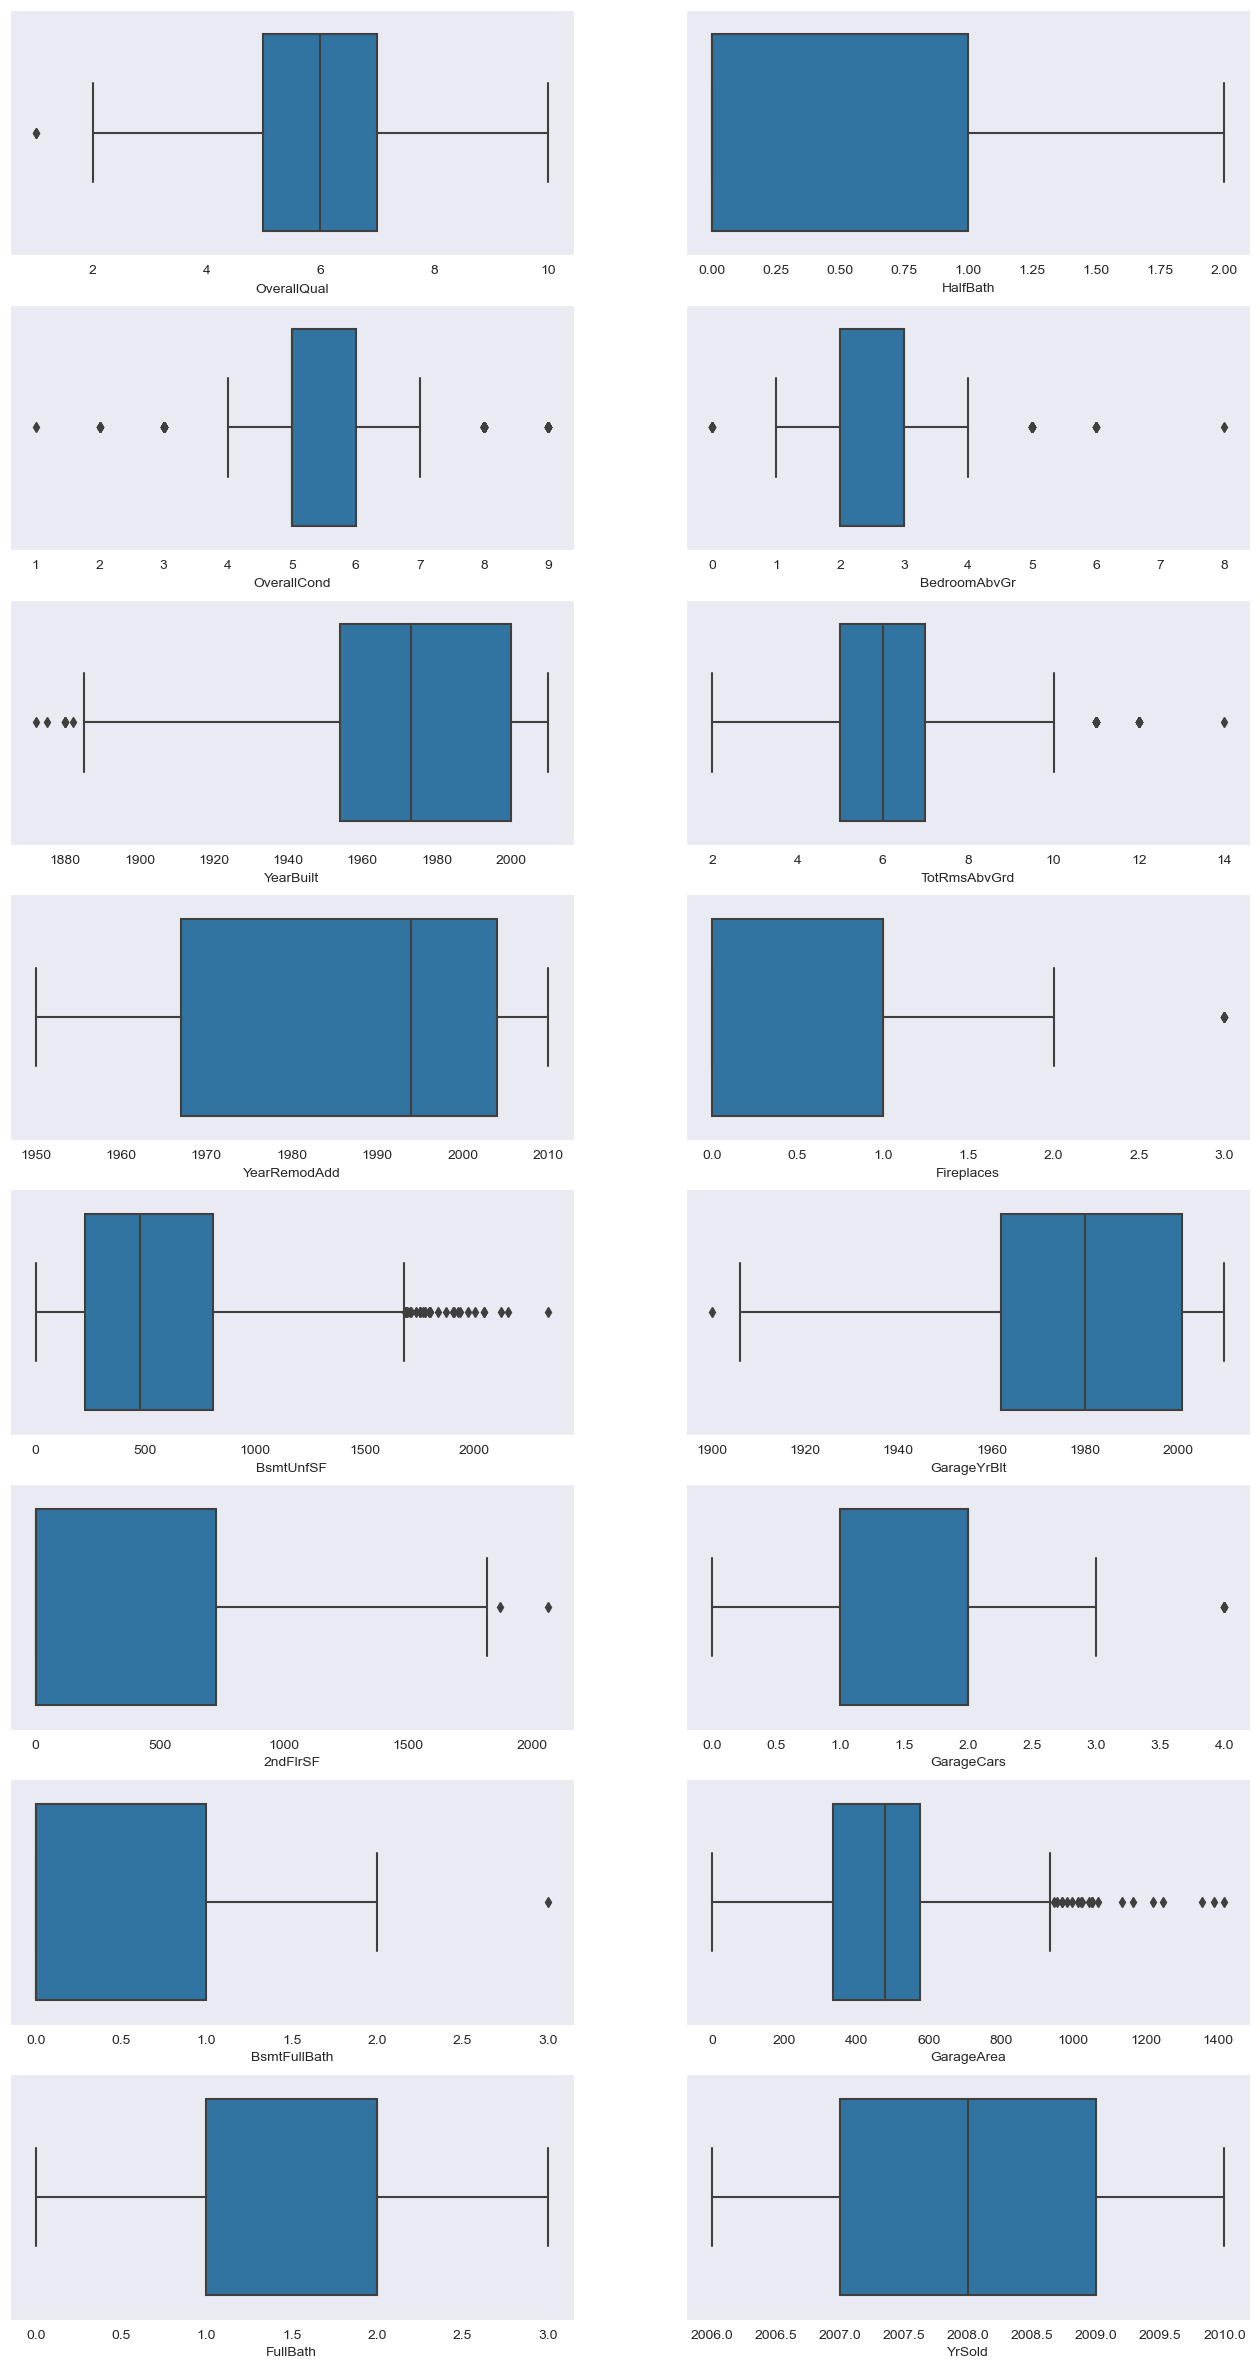

In [219]:
fig, ax = plt.subplots(nrows=8, ncols=2, figsize=(16, 30))
for index, col in enumerate(skew_data.loc[~skew_data["IsNeededSkew"], "Feature"]):
    if index < 8:
        sns.boxplot(data=data_for_skew, x=col, ax=ax[index][0])
    else:
        sns.boxplot(data=data_for_skew, x=col, ax=ax[index-8][1])

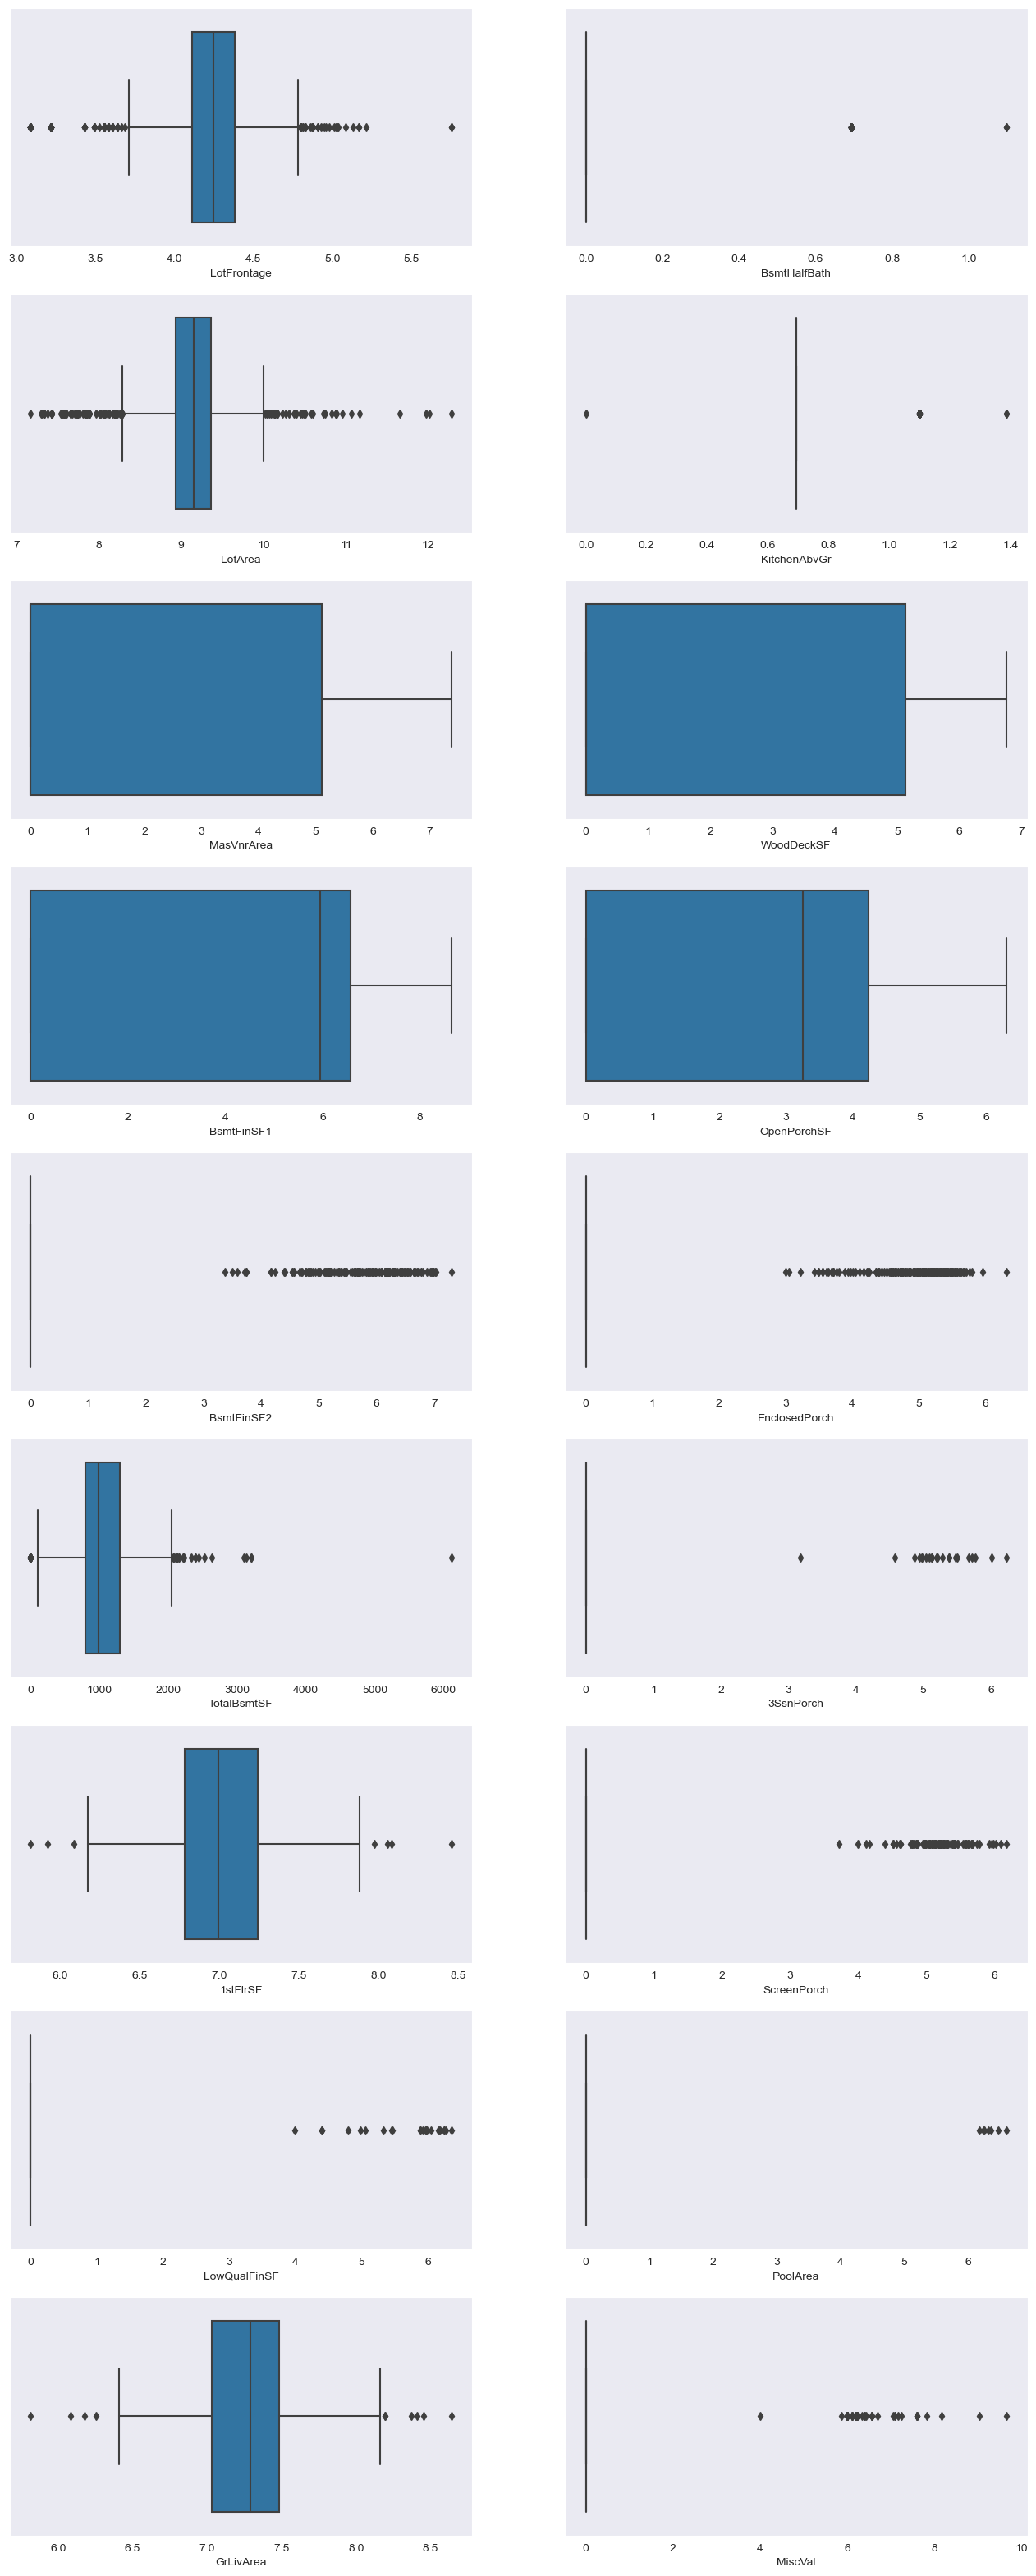

In [220]:
fig, ax = plt.subplots(nrows=9, ncols=2, figsize=(16, 40))
for index, col in enumerate(skew_data.loc[skew_data["IsNeededSkew"], "Feature"]):
    if index < 9:
        sns.boxplot(data=data_for_skew, x=col, ax=ax[index][0])
    else:
        sns.boxplot(data=data_for_skew, x=col, ax=ax[index-9][1])

In [221]:
target = target.drop(train1.loc[train1["BsmtFullBath"]>2.5].index)
target = target.drop(train1.loc[train1["GarageCars"]>3.5].index)
target = target.drop(train1.loc[train1["TotRmsAbvGrd"]>13].index)
train1 = train1.drop(train1.loc[train1["BsmtFullBath"]>2.5].index)
train1 = train1.drop(train1.loc[train1["GarageCars"]>3.5].index)
train1 = train1.drop(train1.loc[train1["TotRmsAbvGrd"]>13].index)

In [222]:
trainXX = train1.fillna({col:train1[col].mode()[0] for col in train1.select_dtypes("O").columns})
trainXX = train1.fillna({col:train1[col].median() for col in train1.select_dtypes(np.number).columns})
isol_forest = IsolationForest(n_estimators=200)
train1X = pd.get_dummies(trainXX)

pred = isol_forest.fit_predict(train1X)
pred = ~np.bool8(pred)

In [223]:
train1["IsAnomaly"] = pred

In [224]:
train1.loc[train1["IsAnomaly"]]
train_id = train1.index.values

In [225]:
data2 = pd.concat([train1.drop("IsAnomaly", axis=1), data1.loc[test_id]], axis=0)

In [226]:
data2.loc[2593, "GarageYrBlt"] = data2["GarageYrBlt"].median()

## Missing values imputation

In [227]:
data2 = data2.drop(["PoolQC", "PoolArea"], axis=1) #попробовать с бассейном bool

In [228]:
data2.loc[(data2["GarageQual"].isna())&(data2["GarageFinish"].isna())&
          (data2["GarageCond"].isna())&(data2["GarageType"].isna())&
          (data2["GarageYrBlt"].isna()),["GarageQual", "GarageFinish", "GarageCond", "GarageType"]] = "none"

data2.loc[(data2["GarageQual"].isna())&(data2["GarageFinish"].isna())&
          (data2["GarageCond"].isna())&(data2["GarageType"].isna())&
          (data2["GarageYrBlt"].isna()),["GarageYrBlt"]] = 0

data2.loc[(data2["BsmtExposure"].isna())&(data2["BsmtCond"].isna())&
          (data2["BsmtQual"].isna())&(data2["BsmtFinType2"].isna())&
          (data2["BsmtFinType1"].isna())&(data2["BsmtFinSF1"].isna())&
          (data2["BsmtFinSF2"].isna()), # другое пересечение
          ["BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1"]] = "none"

In [229]:
data2["MiscFeature"] = data2["MiscFeature"].fillna("none")
data2["Fence"] = data2["Fence"].fillna("none")
data2["FireplaceQu"] = data2["FireplaceQu"].fillna("none")

data2["BsmtFinSF1"] = data2["BsmtFinSF1"].fillna(0)
data2["BsmtFinSF2"] = data2["BsmtFinSF2"].fillna(0)

In [230]:
mis_data = data2.isna().sum()/data2.shape[0]
features_to_impute = mis_data[mis_data > 0].sort_values().index.values

In [231]:
mis_data[mis_data > 0].sort_values(ascending=False)

LotFrontage     0.166552
GarageYrBlt     0.053915
BsmtCond        0.027816
BsmtExposure    0.027816
BsmtQual        0.027473
BsmtFinType2    0.027129
BsmtFinType1    0.026786
MasVnrType      0.008242
MasVnrArea      0.007898
MSZoning        0.001374
GarageQual      0.000687
GarageCond      0.000687
BsmtFullBath    0.000687
BsmtHalfBath    0.000687
GarageFinish    0.000687
Functional      0.000687
GarageArea      0.000343
GarageCars      0.000343
TotalBsmtSF     0.000343
KitchenQual     0.000343
Electrical      0.000343
BsmtUnfSF       0.000343
Exterior2nd     0.000343
Exterior1st     0.000343
SaleType        0.000343
dtype: float64

In [232]:
features_to_impute

array(['TotalBsmtSF', 'GarageArea', 'GarageCars', 'KitchenQual',
       'Electrical', 'BsmtUnfSF', 'SaleType', 'Exterior1st',
       'Exterior2nd', 'BsmtHalfBath', 'GarageQual', 'GarageFinish',
       'Functional', 'GarageCond', 'BsmtFullBath', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtQual', 'BsmtExposure', 'BsmtCond', 'GarageYrBlt',
       'LotFrontage'], dtype=object)

In [233]:
def multiple_imputation_rf(data, target, epochs): #try MICE algo
    ALL = data.copy()
    TARGET = ALL.copy().loc[~ALL[target].isna(), target]
    ALL = ALL.drop(ALL[features_to_impute], axis=1)
    ALL = pd.get_dummies(ALL)
    X_TRAIN = ALL.loc[~pd.concat([ALL, TARGET], axis=1)[target].isna()]
    X_TEST = ALL.loc[pd.concat([ALL, TARGET], axis=1)[target].isna()]
        
    if target in data.select_dtypes(np.number).columns:
        f = RandomForestRegressor(max_depth=8).fit(X_TRAIN, TARGET)
    else:
        f = RandomForestClassifier(max_depth=8).fit(X_TRAIN, TARGET)
            
    pred = f.predict(X_TEST)
        
    return pred     

In [234]:
for col in features_to_impute:
    print(col)
    pred = multiple_imputation_rf(data2, col, 29)
    print(pred)
    if (len(pred.shape) > 1) and (pred.shape[-1] > 1):
        data2 = data2.loc[data2[col].isna(), col] = np.array(pred[:, 0])
        continue
    data2.loc[data2[col].isna(), col] = np.array(pred)
    
    mis_data = data2.isna().sum()/data2.shape[0]
    features_to_impute = mis_data[mis_data > 0].sort_values().index.values

TotalBsmtSF
[694.17289713]
GarageArea
[415.28871232]
GarageCars
[1.78090543]
KitchenQual
['TA']
Electrical
['SBrkr']
BsmtUnfSF
[689.78298983]
SaleType
['WD']
Exterior1st
['VinylSd']
Exterior2nd
['VinylSd']
BsmtHalfBath
[0.0315788  0.06503416]
GarageQual
['TA' 'TA']
GarageFinish
['Unf' 'Unf']
Functional
['Typ' 'Typ']
GarageCond
['TA' 'TA']
BsmtFullBath
[0.00944118 0.01022272]
MSZoning
['RL' 'RL' 'RL' 'RL']
MasVnrArea
[ 83.27260241 330.94270246  67.72180692  77.98273158  85.1415978
 106.79218625 333.85881369 114.36114869 146.4050819   88.50960262
  53.34900867  35.96032293 158.08682774  67.70488264  47.85869621
  35.71328686 109.58555275 216.94631267  93.76111846 215.05770278
 147.63842689 260.43758808  62.61468396]
MasVnrType
['BrkFace' 'BrkFace' 'None' 'BrkFace' 'Stone' 'Stone' 'BrkFace' 'BrkFace'
 'BrkFace' 'Stone' 'BrkFace' 'None' 'BrkFace' 'BrkFace' 'None' 'BrkFace'
 'BrkFace' 'Stone' 'Stone' 'BrkFace' 'BrkFace' 'BrkFace' 'Stone' 'None']
BsmtFinType1
['Unf' 'Unf' 'Unf' 'Unf' 'Unf' '

In [235]:
data2.isna().sum().sum()

0

## Feature engineering

In [236]:
data3 = data2.copy()

In [237]:
log_target = np.log(target)

In [238]:
for col in data3.select_dtypes("O"):
    print(col)
    print(data3[col].nunique())
    data3.loc[:, col] = data3[col].mask(data3[col].map(lambda x: data3[col].value_counts(normalize=True)[x])<=0.005, "Otth")
    print(data3[col].nunique())

MSSubClass
16
15
MSZoning
5
5
Alley
3


KeyboardInterrupt: 

In [ ]:
data3["TotalQual"] = 0.5*data3["OverallCond"] + 0.5*data3["OverallQual"]

#data3["TotalQual"] = data3["TotalQual"].map(str)
data3["OverallCond"] = data3["OverallCond"].map(str)
data3["OverallQual"] = data3["OverallQual"].map(str)

data3["YearDiff"] = (data3["YearRemodAdd"] - data3["YearBuilt"])+100

data3["TotalBath"] = data3["BsmtFullBath"] + 0.5*data3["BsmtHalfBath"] + data3["FullBath"] + 0.5*data3["HalfBath"]

data3["LivingShare"] = data3["GrLivArea"]/data3["LotArea"]

In [ ]:
skew_data = pd.DataFrame({"Feature":data3.select_dtypes(np.number).columns, "Skew":np.abs(stats.skew(data3.select_dtypes(np.number)))})
skew_data["IsNeededSkew"] = np.abs(skew_data["Skew"]) > 1
for col in skew_data.loc[skew_data["IsNeededSkew"], "Feature"]:
    data3[col] = np.log1p(data3[col])
    
skew_data["Skew2"] = np.abs(stats.skew(data3.select_dtypes(np.number)))
skew_data["Diff"] = skew_data["Skew2"] - skew_data["Skew"]
for col in skew_data["Feature"]:
    if float(skew_data.loc[skew_data["Feature"]==col, "Diff"]) > 0.01:
        data3[col] = np.exp(data3[col])-1
skew_data["IsNeededSkew2"] = np.abs(skew_data["Skew2"]) > 1

## Modeling

In [ ]:
data3

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,IsPave,IsAllPub,IsCentralAir,TotalQual,YearDiff,TotalBath,LivingShare
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,4.189655,9.042040,none,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.283204,Gd,TA,PConc,Gd,TA,No,GLQ,6.561031,Unf,0.0,150.0,856.0,GasA,Ex,SBrkr,6.753438,854,0.0,7.444833,1.0,0.000000,2,1,3,0.693147,Gd,8,Typ,0,none,Attchd,2003.000000,RFn,2.0,548.0,TA,TA,Y,0.000000,4.127134,0.000000,0.0,0.0,none,none,0.000000,2,2008,WD,Normal,True,True,True,6.0,4.615121,3.5,0.184292
2,20,RL,4.394449,9.169623,none,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,6.886532,Unf,0.0,284.0,1262.0,GasA,Ex,SBrkr,7.141245,0,0.0,7.141245,0.0,0.693147,2,0,3,0.693147,TA,6,Typ,1,TA,Attchd,1976.000000,RFn,2.0,460.0,TA,TA,Y,5.700444,0.000000,0.000000,0.0,0.0,none,none,0.000000,5,2007,WD,Normal,True,True,True,7.0,4.615121,2.5,0.123507
3,60,RL,4.234107,9.328212,none,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.093750,Gd,TA,PConc,Gd,TA,Mn,GLQ,6.188264,Unf,0.0,434.0,920.0,GasA,Ex,SBrkr,6.825460,866,0.0,7.488294,1.0,0.000000,2,1,3,0.693147,Gd,6,Typ,1,TA,Attchd,2001.000000,RFn,2.0,608.0,TA,TA,Y,0.000000,3.761200,0.000000,0.0,0.0,none,none,0.000000,9,2008,WD,Normal,True,True,True,6.0,4.624973,3.5,0.147347
4,70,RL,4.110874,9.164401,none,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,5.379897,Unf,0.0,540.0,756.0,GasA,Gd,SBrkr,6.869014,756,0.0,7.448916,1.0,0.000000,1,0,3,0.693147,Gd,7,Typ,1,Gd,Detchd,1998.000000,Unf,3.0,642.0,TA,TA,Y,0.000000,3.583519,5.609472,0.0,0.0,none,none,0.000000,2,2006,WD,Abnorml,True,True,True,6.0,5.049856,2.0,0.165337
5,60,RL,4.442651,9.565284,none,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.860786,Gd,TA,PConc,Gd,TA,Av,GLQ,6.486161,Unf,0.0,490.0,1145.0,GasA,Ex,SBrkr,7.044033,1053,0.0,7.695758,1.0,0.000000,2,1,4,0.693147,Gd,9,Typ,1,TA,Attchd,2000.000000,RFn,3.0,836.0,TA,TA,Y,5.262690,4.442651,0.000000,0.0,0.0,none,none,0.000000,12,2008,WD,Normal,True,True,True,6.5,4.615121,3.5,0.143353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,3.091042,7.568896,none,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.000000,TA,TA,CBlock,TA,TA,No,Unf,0.000000,Unf,0.0,546.0,546.0,GasA,Gd,SBrkr,6.304449,546,0.0,6.996681,0.0,0.000000,1,1,3,0.693147,TA,5,Typ,0,none,none,1969.371169,none,0.0,0.0,none,none,Y,0.000000,0.000000,0.000000,0.0,0.0,none,none,0.000000,6,2006,WD,Normal,True,True,True,5.5,4.615121,1.5,0.447278
2916,160,RM,3.091042,7.546974,none,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.

In [ ]:
data4 = data3.copy()
cv = KFold(10)

In [ ]:
data4.loc[:, data4.select_dtypes(np.number).columns] = StandardScaler().fit_transform(data4.select_dtypes(np.number))

In [ ]:
for col in data4.select_dtypes(bool):
    data4[col] = data4[col].map(lambda x: 1 if x else 0)

In [ ]:
data4X = pd.get_dummies(data4)

In [ ]:
X_TRAIN = data4X.loc[train_id]
X_TEST = data4X.loc[test_id]

In [ ]:
data4.loc[train_id]

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,IsPave,IsAllPub,IsCentralAir,TotalQual,YearDiff,TotalBath,LivingShare
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,-0.051772,-0.102433,none,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1.046114,0.896317,Gable,CompShg,VinylSd,VinylSd,BrkFace,1.207188,Gd,TA,PConc,Gd,TA,No,GLQ,0.784036,Unf,-0.363058,-0.935146,-0.442697,GasA,Ex,SBrkr,-0.775702,1.211318,-0.115572,0.567215,1.095674,-0.251329,0.782635,1.234475,0.175179,-0.198008,Gd,0.995441,Typ,-0.925161,none,Attchd,1.016973,RFn,0.312509,0.352630,TA,TA,Y,-0.945347,0.831307,-0.427618,-0.112911,-0.309551,none,none,-0.189565,2,0.157934,WD,Normal,1,1,1,0.201324,-0.570407,1.595509,0.235164
2,20,RL,0.547192,0.147852,none,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,0.153580,-0.395160,Gable,CompShg,MetalSd,MetalSd,None,-0.806151,TA,TA,CBlock,Gd,TA,Gd,ALQ,0.893225,Unf,-0.363058,-0.630068,0.477874,GasA,Ex,SBrkr,0.425790,-0.785333,-0.115572,-0.369411,-0.820630,3.895183,0.782635,-0.757099,0.175179,-0.198008,TA,-0.286330,Typ,0.622265,TA,Attchd,-0.018811,RFn,0.312509,-0.058191,TA,TA,Y,1.254177,-1.085258,-0.427618,-0.112911,-0.309551,none,none,-0.189565,5,-0.602236,WD,Normal,1,1,1,1.370328,-0.570407,0.352372,-0.459893
3,60,RL,0.078237,0.458966,none,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,0.980001,0.848484,Gable,CompShg,VinylSd,VinylSd,BrkFace,1.134991,Gd,TA,PConc,Gd,TA,Mn,GLQ,0.658992,Unf,-0.363058,-0.288564,-0.297583,GasA,Ex,SBrkr,-0.552566,1.239374,-0.115572,0.701297,1.095674,-0.251329,0.782635,1.234475,0.175179,-0.198008,Gd,-0.286330,Typ,0.622265,TA,Attchd,0.940249,RFn,0.312509,0.632735,TA,TA,Y,-0.945347,0.661374,-0.427618,-0.112911,-0.309551,none,none,-0.189565,9,0.157934,WD,Normal,1,1,1,0.201324,-0.515518,1.595509,-0.187297
4,70,RL,-0.282183,0.137609,none,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,-1.862886,-0.682155,Gable,CompShg,Wd Sdng,Wd Shng,None,-0.806151,TA,TA,BrkTil,TA,Gd,No,ALQ,0.387828,Unf,-0.363058,-0.047234,-0.669439,GasA,Gd,SBrkr,-0.417627,0.982194,-0.115572,0.579811,1.095674,-0.251329,-1.027558,-0.757099,0.175179,-0.198008,Gd,0.354556,Typ,0.622265,Gd,Detchd,0.825162,Unf,1.636631,0.791461,TA,TA,Y,-0.945347,0.578862,2.740207,-0.112911,-0.309551,none,none,-0.189565,2,-1.362405,WD,Abnorml,1,1,1,0.201324,1.851571,-0.269196,0.018418
5,60,RL,0.688169,0.924041,none,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,0.946944,0.752819,Gable,CompShg,VinylSd,VinylSd,BrkFace,1.427295,Gd,TA,PConc,Gd,TA,Av,GLQ,0.758921,Unf,-0.363058,-0.161069,0.212586,GasA,Ex,SBrkr,0.124610,1.676579,-0.115572,1.341364,1.095674,-0.251329,0.782635,1.234475,1.401428,-0.198008,Gd,1.636326,Typ,0.622265,TA,Attchd,0.901886,RFn,1.636631,1.697134,TA,TA,Y,1.085269,0.977827,-0.427618,-0.112911,-0.309551,none,none,-0.189565,12,0.157934,WD,Normal,1,1,1,0.785826,-0.570407,1.595509,-0.232960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,-0.187829,-0.230233,none,Reg,Lvl,Ins

In [ ]:
cb = CatBoostRegressor()
cb.fit(Pool(data4.loc[train_id], label=log_target, cat_features = np.array(data4.select_dtypes("O").columns.array)))

Learning rate set to 0.043433
0:	learn: 0.3883809	total: 80.5ms	remaining: 1m 20s
1:	learn: 0.3778246	total: 179ms	remaining: 1m 29s
2:	learn: 0.3673803	total: 256ms	remaining: 1m 25s
3:	learn: 0.3567584	total: 321ms	remaining: 1m 19s
4:	learn: 0.3481492	total: 418ms	remaining: 1m 23s
5:	learn: 0.3390064	total: 501ms	remaining: 1m 23s
6:	learn: 0.3298214	total: 578ms	remaining: 1m 21s
7:	learn: 0.3213111	total: 642ms	remaining: 1m 19s
8:	learn: 0.3140467	total: 707ms	remaining: 1m 17s
9:	learn: 0.3060226	total: 809ms	remaining: 1m 20s
10:	learn: 0.2991790	total: 881ms	remaining: 1m 19s
11:	learn: 0.2921810	total: 985ms	remaining: 1m 21s
12:	learn: 0.2851106	total: 1.04s	remaining: 1m 19s
13:	learn: 0.2783646	total: 1.1s	remaining: 1m 17s
14:	learn: 0.2717569	total: 1.2s	remaining: 1m 18s
15:	learn: 0.2655112	total: 1.26s	remaining: 1m 17s
16:	learn: 0.2590034	total: 1.33s	remaining: 1m 16s
17:	learn: 0.2536029	total: 1.4s	remaining: 1m 16s
18:	learn: 0.2483217	total: 1.46s	remaining: 1

In [ ]:
pred = cb.predict(Pool(data4.loc[test_id], cat_features = np.array(data4.select_dtypes("O").columns.array)))

In [ ]:
subm = pd.DataFrame({"Id":test_id, "SalePrice":np.exp(pred)}).set_index("Id")

In [ ]:
subm.to_csv("sub.csv")

In [206]:
from itertools import accumulate
print(1, *accumulate(range(int(input())+1), lambda x,y: x*y)), sep="\n")

1
0
0
0
0


In [207]:
print(0 in list(map(int, input().split()[1:])))

False


In [214]:
any(map(lambda x: int(x)==0, input().split()[1:]))

True

In [186]:
[1].extend(list(range(1, int(input()+1))))

TypeError: can only concatenate str (not "int") to str

In [3]:
from itertools import permutations

In [235]:
print(*map(lambda x: "".join(x), permutations(range(1, int(input())+1))), sep="\n")

TypeError: sequence item 0: expected str instance, int found

In [6]:
print(*map(lambda x:"".join(x), permutations(map(str, range(1, int(input())+1)))), sep="\n")

123
132
213
231
312
321


In [251]:
"".join((1,2,3))

'123'

In [208]:
import os

class EmptyDirectoryError(BaseException):
    pass

class DirectoryIndex:
    
    def __init__(self, dirpath: str, encoding: str='utf-8'):
        self.dirpath = dirpath
        self.encoding = encoding
        self.__last_number = None
        self.__n_texts = None
        self.__unique_words_dict = None
        self.__word_in_text = None
        self.__index = None
    
    def _read_file(self, file_name):
        unique_words = set()
        with open(f"{self.dirpath}{file_name}", "r") as file:
            for string in file:
                string = string.lower().split()
                #string = "".join(list(map(lambda char: char if (char.isalpha() or char.isspace()) else "", string.lower()))).split()
                for word in string:
                    unique_words.add(word)
        return unique_words
    
    def find_documents(self, word: str) -> list:
        try:
            word_id = self.__unique_words_dict[word]
        except BaseException:
            return []
        
        return self.__index[word_id]
    
    def update(self, filepath: str, encoding: str='utf-8'):
        unique = self._read_file(filepath)
        for word in unique:
            if word not in self.__unique_words_dict:
                self.__unique_words_dict[word] = self.__last_number
                self.__last_number += 1
            word_id = self.__unique_words_dict[word]
            if word_id not in self.__index:
                self.__index[word_id] = []
            self.__index[word_id].append(filepath)
    
    @property
    def inverted_index(self):
        all_files = [f for f in os.listdir(self.dirpath) if os.path.isfile(os.path.join(self.dirpath, f))]
        if len(all_files) == 0:
            raise EmptyDirectoryError
        af0 = all_files.copy()
        unique_words_dict = {}
        word_in_text = set()
        inversed_index = {}
        word_id = 0
        
        while af0:
            file = af0.pop()
            temp_words = self._read_file(file)
            for w in temp_words:
                if w not in unique_words_dict:
                    unique_words_dict[w] = word_id
                word_id += 1
                
        self.__last_number = word_id + 1
                
        for file in all_files:
            temp_words = self._read_file(file)
            for word in temp_words:
                word_in_text.add((unique_words_dict[word], file))
        
        for word_id, text_id in word_in_text:
            if word_id not in inversed_index:
                inversed_index[word_id] = []
            inversed_index[word_id].append(text_id)
        
        self.__unique_words_dict = unique_words_dict
        self.__word_in_text = word_in_text        
        self.__index = inversed_index
            

In [211]:
dindex = DirectoryIndex("dataset/")

In [212]:
dindex.inverted_index

In [213]:
arr = dindex.find_documents('shakespeare')
sorted(map(int, arr))

[0, 1, 2, 3, 7, 12, 15, 19, 20, 30, 33, 34, 39, 44]

In [214]:
dindex.update("bom")

TypeError: unsupported operand type(s) for +=: 'NoneType' and 'int'